October 2020
<img width=300 src="./fig/ladisk.png">

<center>Prof. dr. Janko Slavič</center>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Fourier integral transform

Fourier series:

$
x(t)=\sum_{n=-\infty}^{\infty}
c_n\,e^{j\,2\,\pi\,n\,t/T_p}
$

$
c_n=\frac{1}{T_p}\int_{T_p/2}^{T_p/2}x(t)\,\,e^{-j\,2\,\pi\,n\,t/T_p} \,dt
$

When $T_p\rightarrow\infty$

Fourier transform - Fourier integral:

$
x(t)=\int_{-\infty}^{\infty}
X(f)\,e^{j\,2\,\pi\,f\,t}\,df
$


$
X(f)=\int_{-\infty}^{\infty}
x(t)\,e^{-j\,2\,\pi\,f\,t}\,dt
$ (Amplitude density $X(f)=\lim_{\Delta f\rightarrow 0}\frac{c_n}{\Delta f}$)

In [4]:
def Xf(x, t, f, sign=-1):
    dt = t[1] - t[0]
    return np.trapz(x*np.exp(sign*1j*2*np.pi*f*t), dx=dt)

def X(x, t, f):
    return np.asarray([Xf(x, t, _) for _ in f])

def xr(X, t, f):
    return np.asarray([Xf(X, f, _, 1) for _ in t]) # pazi minus pri f

Halfsine impulse

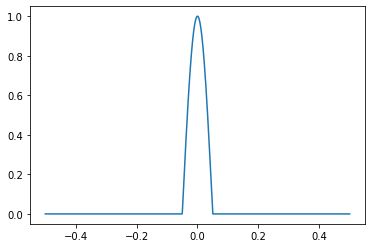

In [5]:
T = 1.
N = 1000
w = 0.1
t = np.linspace(-T/2, T/2, N)
f0 = 1/(2*w*T)
x = np.cos(2*np.pi*f0*t+2*0)#prikaz faze
x[np.logical_or(-w*T*0.5>t, t>w*T*0.5)] = 0.
#x = x+0.5*(np.random.rand(N)-0.5)
plt.plot(t,x);
#plt.xlim(-0.2,0.2);

In [6]:
t[:4]

array([-0.5     , -0.498999, -0.497998, -0.496997])

In [7]:
t[-4:]

array([0.496997, 0.497998, 0.498999, 0.5     ])

Amplitude spectra

In [8]:
n = 100
f = np.arange(-n,n+1)/T
1/T

1.0

In [9]:
X1 = X(x,t,f)

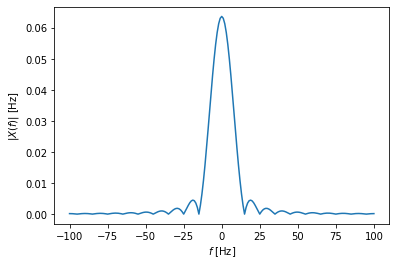

In [10]:
df = f[1]-f[0]
plt.plot(f, np.abs(X1))
plt.xlabel('$f$ [Hz]')
plt.ylabel('$|X(f)|$ [Hz]');

Phase spectra

In [11]:
#np.abs(X1)[:41]

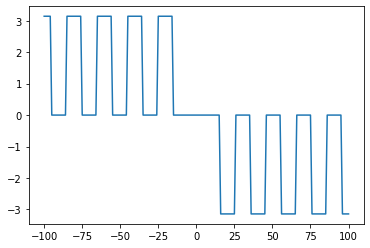

In [12]:
plt.plot(f,np.angle(X1));

In [13]:
f0

5.0

In [14]:
np.angle(X1)[f==f0]

array([0.])

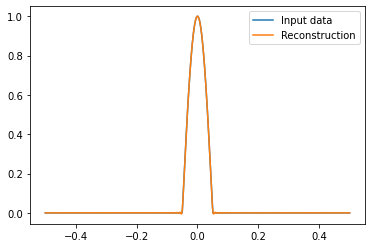

In [15]:
x1 = np.real(xr(X1, t, f))
plt.plot(t, x, label='Input data')
plt.plot(t, x1, label='Reconstruction');
plt.legend();

## Properties of Fourier transform

### Časovno skaliranje - Time scaling

$F\{x(a\,t)\}=\frac{1}{|a|}X(f/a)$

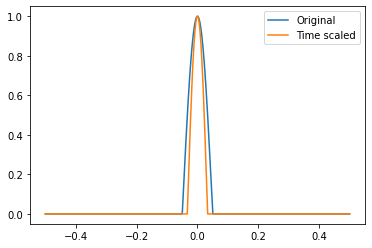

In [16]:
n = 100
f = np.arange(-n,n+1)/T
a = 1.5
t2 = a*t
x2 = np.cos(2*np.pi*t2 / (2*w*T))
x2[np.logical_or(-w*T*0.5/a > t, t > w*T*0.5/a)] = 0.
x2 = x2# + 0.05*(np.random.rand(N)-0.5)
plt.plot(t, x, label='Original');
plt.plot(t, x2, label='Time scaled');
plt.legend();

In [17]:
X1 = X(x, t, f)
X2 = X(x2, t, f)

Amplitude spectra

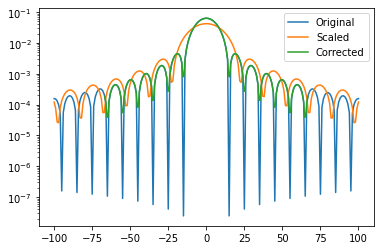

In [18]:
plt.semilogy(f, np.abs(X1), label='Original')
plt.semilogy(f, np.abs(X2), label='Scaled')
plt.semilogy(f/a, np.abs(X2*a), label='Corrected')
plt.legend();

Phase spectra

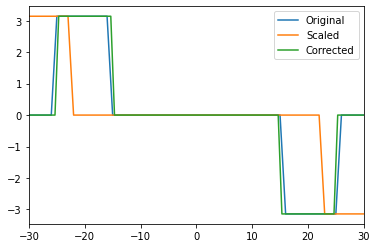

In [19]:
plt.plot(f, np.angle(X1), label='Original');
plt.plot(f, np.angle(X2), label='Scaled');
plt.plot(f/a, np.angle(X2*a), label='Corrected');
plt.xlim(-30,30)
plt.legend();

#### Časovni obrat - time reversal

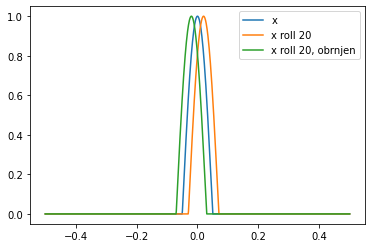

In [20]:
plt.plot(t, x, label='x')
plt.plot(t, np.roll(x, 20), label='x roll 20')
plt.plot(t, np.roll(x, 20)[::-1], label='x roll 20, obrnjen')
plt.legend();

$F\{x(-t)\}=X(-f)$

In [21]:
X1 = X(np.roll(x, 20), t, f)

In [22]:
X2 = X(np.roll(x, 20)[::-1], t, f)

Amplitude spectra

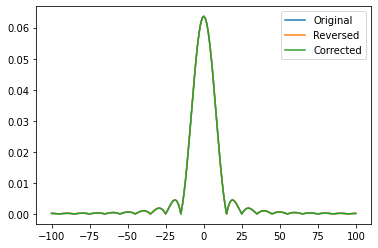

In [23]:
plt.plot(f, np.abs(X1), label='Original')
plt.plot(f, np.abs(X2), label='Reversed')
plt.plot(-f, np.abs(X2), label='Corrected')
plt.legend();

Phase spectra

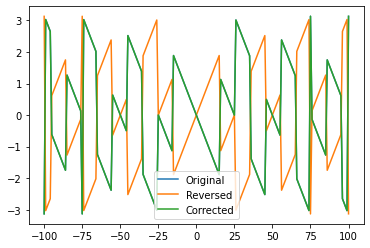

In [24]:
plt.plot(f, np.angle(X1), label='Original')
plt.plot(f, np.angle(X2), label='Reversed')
plt.plot(f[::-1], np.angle(X2), label='Corrected')
plt.legend();

In [25]:
np.allclose(np.abs(X1),np.abs(X2[::-1]))

True

In [26]:
np.allclose(np.angle(X1), np.angle(X2[::-1]))

True

#### Časovni premik - time shifting

$F\{x(t-t_0)\}=e^{-j\,2\pi\,f\,t_0}\,X(f)$

In [27]:
X1 = X(x, t, f)

In [28]:
dt = t[1] - t[0]
t0 = 0.33*dt#+1e-6
x2 = np.cos(2*np.pi*f0*(t-t0)+0.*np.pi/3)#prikaz faze
x2[np.logical_or(-w*T*0.5>t-t0, t-t0>w*T*0.5)] = 0.

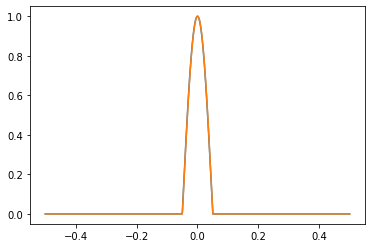

In [29]:
plt.plot(t, x)
plt.plot(t, x2)

Metoda odstranjevanja diskretnih točk (`x2` je "pravi" signal)

In [30]:
x2 = np.roll(x2, -np.int(t0/dt)) + np.random.normal(size=len(x))*1e-6*0
X2 = X(x2, t, f)

Priprava za korekcijo v frekvenčni domeni

In [31]:
X2 = X(x2, t, f)

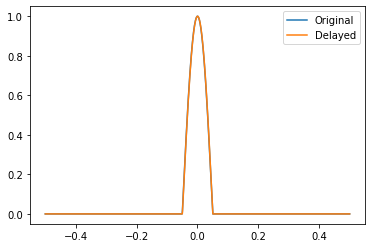

In [32]:
plt.plot(t, x, label='Original')
plt.plot(t, x2, label='Delayed')
#plt.xlim(-0.1, 1)
plt.legend();

In [33]:
t0

0.0003303303303303229

In [34]:
#t0=0.045
b = np.exp(-1j*2*np.pi*f*t0)
X3 = X2/b;

Amplitude spectra

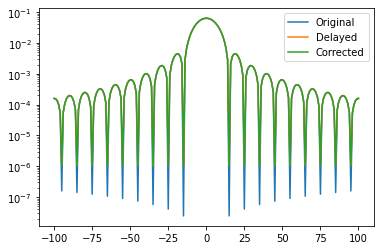

In [35]:
plt.semilogy(f,np.abs(X1), label='Original')
plt.semilogy(f,np.abs(X2), label='Delayed')
plt.semilogy(f,np.abs(X3), label='Corrected')
plt.legend();
#plt.xlim(f0-5, f0+5);

Phase spectra

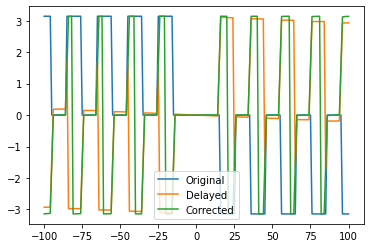

In [36]:
plt.plot(f,np.angle(X1), label='Original')
plt.plot(f,np.angle(X2), label='Delayed')
plt.plot(f,np.angle(X3), label='Corrected')
plt.legend();

In [37]:
np.allclose(np.abs(X1), np.abs(X3), atol=1e-4)

True

In [38]:
np.allclose(np.angle(X1), np.angle(X3), atol=1e-3)

False

In [39]:
np.angle(X1)[:10]

array([3.14159265e+00, 3.14159265e+00, 3.14159265e+00, 3.14159265e+00,
       3.14159265e+00, 2.05968581e-10, 5.13038783e-13, 2.83557642e-13,
       1.84364577e-13, 1.29459052e-13])

In [40]:
np.angle(X3)[:10]

array([-3.13789721e+00, -3.13589088e+00, -3.13348046e+00, -3.12962431e+00,
       -3.11951460e+00, -1.61881008e+00, -1.49907927e-02, -4.93024279e-03,
       -1.20588434e-03,  9.94510398e-04])

#### Modulacija - modulation

$F\{x(t)\,e^{j\,2\pi\,f_0\,t}\}=X(f-f_0)\}$

In [41]:
X1 = X(x, t, f)

In [42]:
f0 = 10 # frequency modulation
x2 = x * np.exp(1j*2*np.pi*f0*t)
X2 = X(x2, t, f)

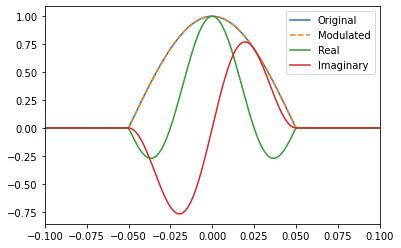

In [43]:
plt.plot(t,np.abs(x), label='Original')
plt.plot(t,np.abs(x2), '--', label='Modulated')
plt.plot(t, np.real(x2), label='Real')
plt.plot(t, np.imag(x2), label='Imaginary')
plt.xlim(-w*T, w*T)
plt.legend();

Amplitude spectra

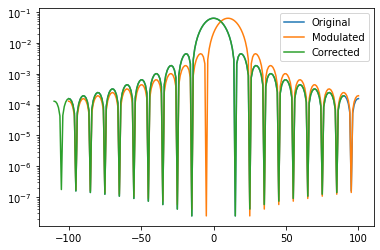

In [44]:
plt.semilogy(f,np.abs(X1), label='Original')
plt.semilogy(f,np.abs(X2), label='Modulated')
plt.semilogy(f-f0,np.abs(X2), label='Corrected')
#plt.xlim(-15,15)
plt.legend();

Phase spectra

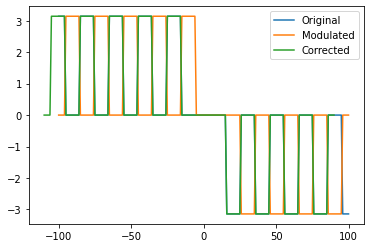

In [45]:
plt.plot(f,np.angle(X1), label='Original')
plt.plot(f,np.angle(X2), label='Modulated')
plt.plot(f-f0,np.angle(X2), label='Corrected')
plt.legend();

#### Odvajanje - derivation

$F\{\dot x(t)\}=j\,2\pi\,f\,X(f)$

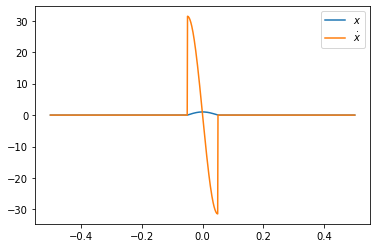

In [46]:
T = 1.
N = 1000
w = 0.1
t = np.linspace(-T/2, T/2, N)
x = np.cos(2*np.pi*t/(2*w*T))
dx = -np.sin(2*np.pi*t/(2*w*T))*2*np.pi/(2*w*T)
x[np.logical_or(-w*T*0.5 > t, t > w*T*0.5)] = 0.
dx[np.logical_or(-w*T*0.5 > t, t > w*T*0.5)] = 0.
#x = x + 0.005*(np.random.rand(N)-0.5)
#dx = dx + 0.05*(np.random.rand(N)-0.5)
plt.plot(t, x, label='$x$')
plt.plot(t, dx, label='$\dot{x}$')
plt.legend();

In [47]:
X1 = X(x, t, f)
X2 = X(dx, t, f)

In [48]:
b = 1j*2*np.pi*f
X3 = b*X1

Amplitude spectra

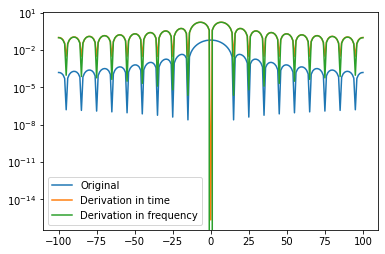

In [49]:
plt.semilogy(f,np.abs(X1), label='Original')                # X(f) <- x(t)
plt.semilogy(f,np.abs(X2), label='Derivation in time')      # dX(f) <- dx(t)
plt.semilogy(f,np.abs(X3), label='Derivation in frequency') # dX(f) <- X(f)
plt.legend();

Phase spectra

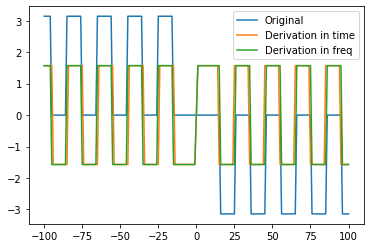

In [50]:
plt.plot(f,np.angle(X1), label='Original')                # X(f) <- x(t)
plt.plot(f,np.angle(X2), label='Derivation in time')      # dX(f) <- dx(t)
plt.plot(f,np.angle(X3), label='Derivation in freq') # dX(f) <- X(f)
plt.legend();

#### Integriranje - integration

$F\{\int x(t) dt\}=\frac{X(f)}{j\,2\pi\,f}$

In [51]:
X1 = X(dx, t, f)
X2 = X(x, t, f)

In [52]:
b = 1j*2*np.pi*f
X3 = X1/b

<ipython-input-52-715fd5a557c8>:2: RuntimeWarning: divide by zero encountered in true_divide
  X3 = X1/b
<ipython-input-52-715fd5a557c8>:2: RuntimeWarning: invalid value encountered in true_divide
  X3 = X1/b


Amplitude spectra

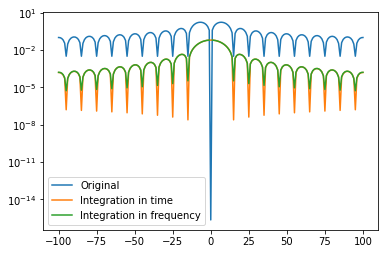

In [53]:
plt.semilogy(f, np.abs(X1), label='Original')
plt.semilogy(f, np.abs(X2), label='Integration in time')
plt.semilogy(f, np.abs(X3), label='Integration in frequency')
plt.legend();

Phase spectra

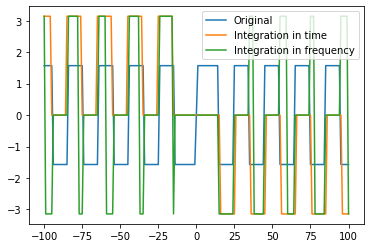

In [54]:
plt.plot(f,np.angle(X1), label='Original');
plt.plot(f,np.angle(X2), label='Integration in time');
plt.plot(f,np.angle(X3), label='Integration in frequency')
plt.legend();

#### Convolution of two functions

$F\{h(t)\ast x(t)\}=H(f)\,X(f)$

$h(t)\ast x(t)= \int_{-\infty}^t h(\tau)\,x(t-\tau)\,d\tau$

Impulse response function of damped system: $h(t)=\frac{1}{\omega_{0d}}\,e^{-\delta\,\omega_0\,t}\,\sin(\omega_{0d}\,t)$

In [76]:
N = 1000
T = 2
dt = T/N
f = 1/T*np.arange(-100,100)
F0 = 300e3
t0 = 0.5
tx = dt*np.arange(N)
k = 10e5
m = 500
delta = .1 # damping
omega0 = np.sqrt(k/m)
omega0d = omega0*np.sqrt(1-delta*delta)
h = np.exp(-delta*omega0*tx) * np.sin(omega0d*tx)/omega0d
x = F0*(1-tx/t0)/m
x[tx>t0] = 0.

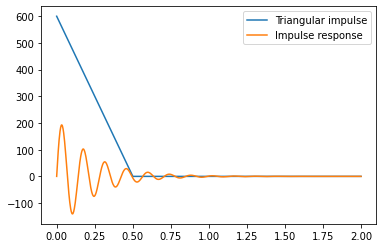

In [77]:
plt.plot(tx, x, label='Triangular impulse')
plt.plot(tx, 10000*h, label='Impulse response')
plt.legend();

Undamped system: analytical solution in time domain (see Višja dinamika or SS Rao: Mechanical Vibrations)

In [78]:
xh1 = F0/(m*omega0**2)*(1-tx/t0-np.cos(omega0*tx)+1/(omega0*t0)*np.sin(omega0*tx))
xh1[tx>t0] = 0
xh2 = F0/(m*omega0**2)*(-np.cos(omega0*tx)+1/(omega0*t0)*(-np.sin(omega0*(tx-t0))+np.sin(omega0*tx)))
xh2[tx<=t0] = 0
xh = xh1+xh2

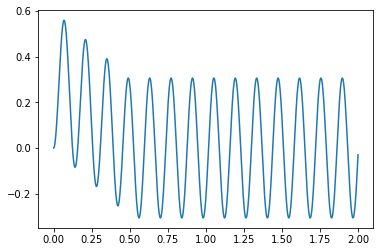

In [79]:
#plt.plot(tx,xh1, alpha=0.5)
#plt.plot(tx,xh2, alpha=0.5);
plt.plot(tx, xh);

In [80]:
XH = X(xh, tx, f)
H = X(h, tx, f)
xX = X(x, tx, f)

rek2 = xr(XH, tx, f)
rek = xr(xX*H, tx, f)

c:\users\slavic\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\slavic\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


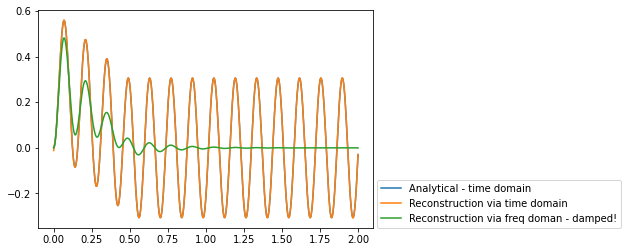

In [81]:
plt.plot(tx, xh, label='Analytical - time domain');
plt.plot(tx, rek2, label='Reconstruction via time domain')
plt.plot(tx, rek, label='Reconstruction via freq doman - damped!')
plt.legend(loc=(1.01, 0));

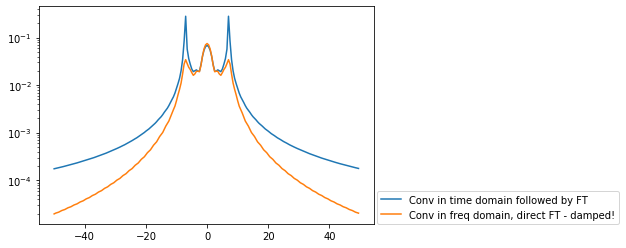

In [388]:
plt.semilogy(f,np.abs(XH), label='Conv in time domain followed by FT');
plt.semilogy(f,np.abs(xX*H), label='Conv in freq domain, direct FT - damped!');
plt.legend(loc=(1.01, 0));

### Numeric convolution

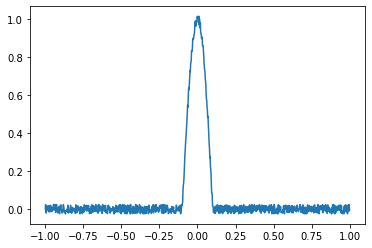

In [201]:
T = 2.
N = 1000
w = 0.1
dt = T/(N-1)
t = dt*np.arange(N)-T/2
x = np.cos(2*np.pi*t/(2*w*T))
x[np.logical_or(-w*T*0.5 > t, t > w*T*0.5)] = 0.
x = x+0.05*(np.random.rand(N)-0.5)
plt.plot(t,x);

In [202]:
delta = 0.1 # damping
omega0 = 2*np.pi*10
omega0d = omega0*np.sqrt(1-delta*delta)
th = dt*np.arange(len(x))
h = np.exp(-delta*omega0*th)*np.sin(omega0d*th)/omega0d

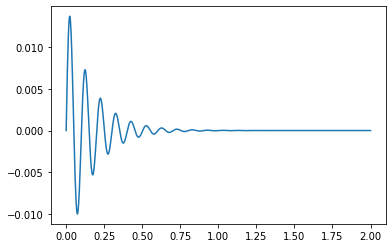

In [203]:
plt.plot(th,h);

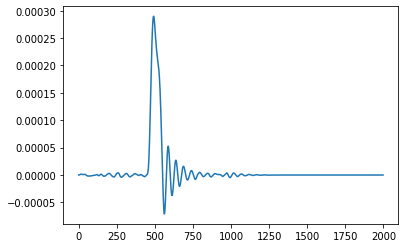

In [204]:
hx = np.convolve(h,x)*dt#dolžina: vsota obeh dolžin, pazi !dt!
plt.plot(hx);

In [205]:
hx = hx[:len(x)] # odrežemo dolžino po času, ki nas zanima

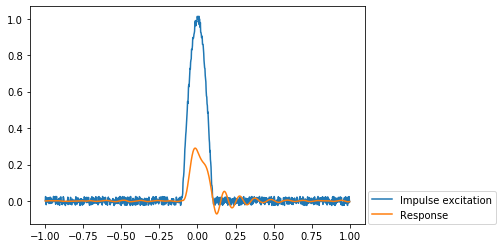

In [206]:
plt.plot(t, x, label='Impulse excitation')
plt.plot(t,1000*hx, label='Response')
plt.legend(loc=(1.01, 0));

In [207]:
HX = X(hx, t, f)
H = X(h, t, f)
X2 = X(x, t, f)

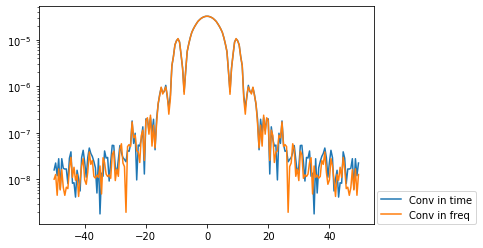

In [208]:
plt.semilogy(f,np.abs(HX), label='Conv in time');
plt.semilogy(f,np.abs(H*X2), label='Conv in freq');
plt.legend(loc=(1.01, 0));